# Importing data and libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df = pd.read_csv('diabetes_data_upload.csv')
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

## Checking unique values of every feature

In [4]:
for i in df.columns:
    print(f'{i} {df[i].unique()}')

Age [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Gender ['Male' 'Female']
Polyuria ['No' 'Yes']
Polydipsia ['Yes' 'No']
sudden weight loss ['No' 'Yes']
weakness ['Yes' 'No']
Polyphagia ['No' 'Yes']
Genital thrush ['No' 'Yes']
visual blurring ['No' 'Yes']
Itching ['Yes' 'No']
Irritability ['No' 'Yes']
delayed healing ['Yes' 'No']
partial paresis ['No' 'Yes']
muscle stiffness ['Yes' 'No']
Alopecia ['Yes' 'No']
Obesity ['Yes' 'No']
class ['Positive' 'Negative']


### Checking for empty entries


In [5]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

### Checking for how the data is distributed and some EDL

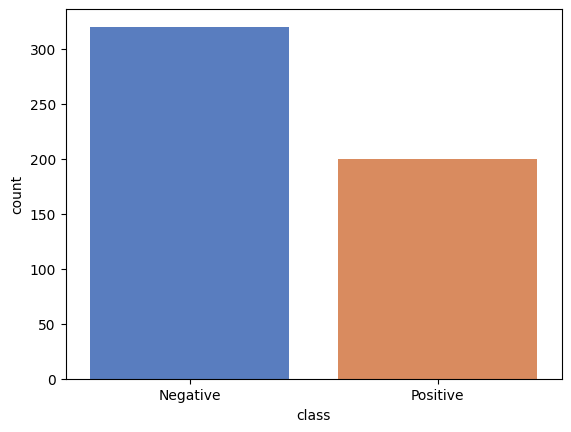

Negative percentage:  61.54 %
Positive percentage:  38.46 %


In [6]:
g = sns.countplot(x='class', data=df, palette="muted")
g.set_xticklabels(["Negative", "Positive"])
plt.show()

print('Negative percentage: ', round(df['class'].value_counts()[0] / len(df) * 100, 2), '%')
print('Positive percentage: ', round(df['class'].value_counts()[1] / len(df) * 100, 2), '%')


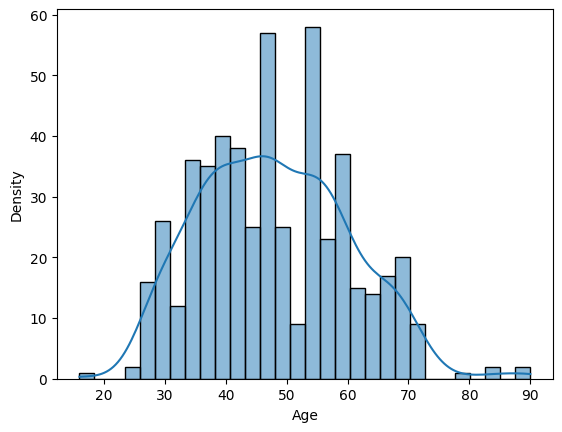

In [7]:
#Checking for age distribution
sns.histplot(df['Age'], bins=30, kde=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

46.36
49.071875


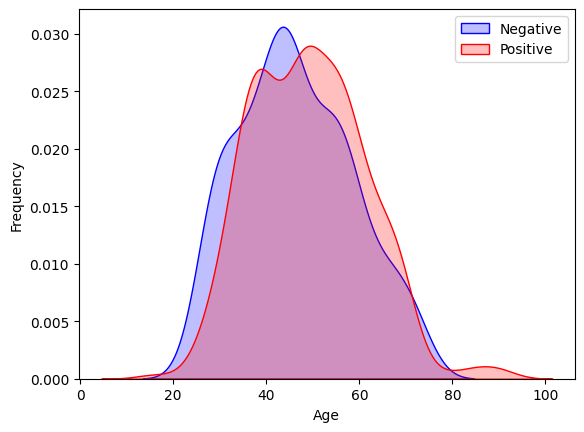

In [8]:
df['class'] = df['class'].map( {'Positive': 1, 'Negative': 0} ).astype(int)
g = sns.kdeplot(df["Age"][(df["class"] == 0)], color="Blue", fill = True)
g = sns.kdeplot(df["Age"][(df["class"] == 1)], ax =g, color="Red", fill= True)
g.set_xlabel("Age")
g.set_ylabel("Frequency") # tính thường xuyên
g = g.legend(["Negative","Positive"])
mean_negative = df["Age"][(df["class"] == 0)].mean() 
mean_positive = df["Age"][(df["class"] == 1)].mean()
print(mean_negative)
print(mean_positive)

### Converting text data to numerical representation

In [9]:
number=LabelEncoder()
for feature in df.columns:
    df[feature]=number.fit_transform(df[feature].astype('str'))

In [10]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,15,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,24,0,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,34,0,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,8,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0
519,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,23.905769,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,11.754586,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,23.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,33.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Checking the correlation matrix we can see all the features are related to each other so no dropping

### Create a Correlation Matrix to find if we can drop any weakly or not related features

<Axes: >

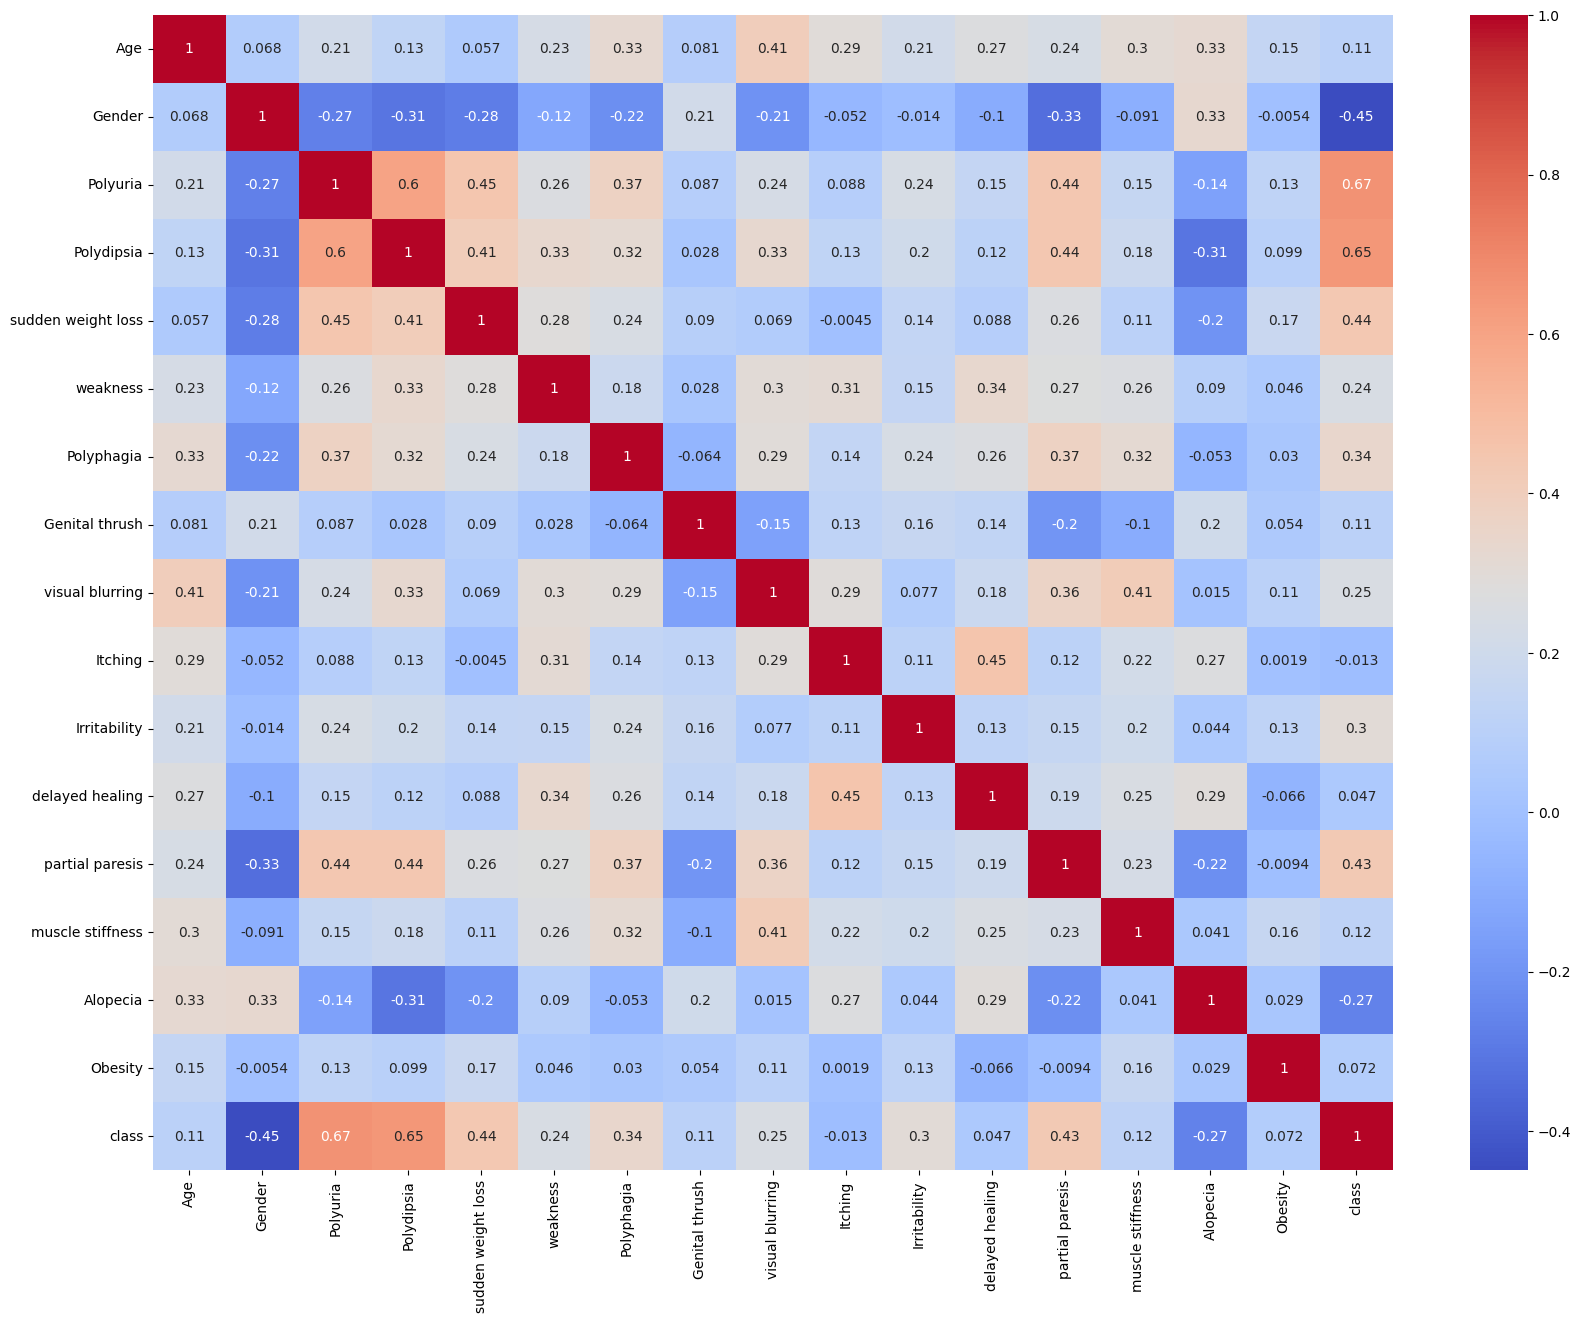

In [12]:
corrmatrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmatrix,annot=True,cmap='coolwarm',ax=ax)

In [13]:
print(corrmatrix)

                         Age    Gender  Polyuria  Polydipsia   
Age                 1.000000  0.067835  0.209066    0.130718  \
Gender              0.067835  1.000000 -0.268894   -0.312262   
Polyuria            0.209066 -0.268894  1.000000    0.598609   
Polydipsia          0.130718 -0.312262  0.598609    1.000000   
sudden weight loss  0.056937 -0.281840  0.447207    0.405965   
weakness            0.233688 -0.124490  0.263000    0.332453   
Polyphagia          0.325301 -0.219968  0.373873    0.316839   
Genital thrush      0.080612  0.208961  0.087273    0.028081   
visual blurring     0.405024 -0.208092  0.235095    0.331250   
Itching             0.293839 -0.052496  0.088289    0.128716   
Irritability        0.210919 -0.013735  0.237740    0.203446   
delayed healing     0.265017 -0.101978  0.149873    0.115691   
partial paresis     0.236820 -0.332288  0.441664    0.442249   
muscle stiffness    0.304223 -0.090542  0.152938    0.180723   
Alopecia            0.326015  0.327871 -

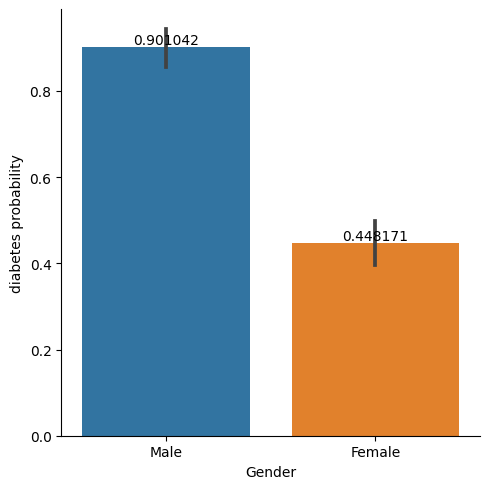

In [14]:
sg  = sns.catplot(x="Gender",y="class",data=df,kind="bar")
sg.set_xticklabels(["Male", "Female"])
sg.set_ylabels("diabetes probability")
ax = sg.ax
for i in ax.containers:
    ax.bar_label(i,)

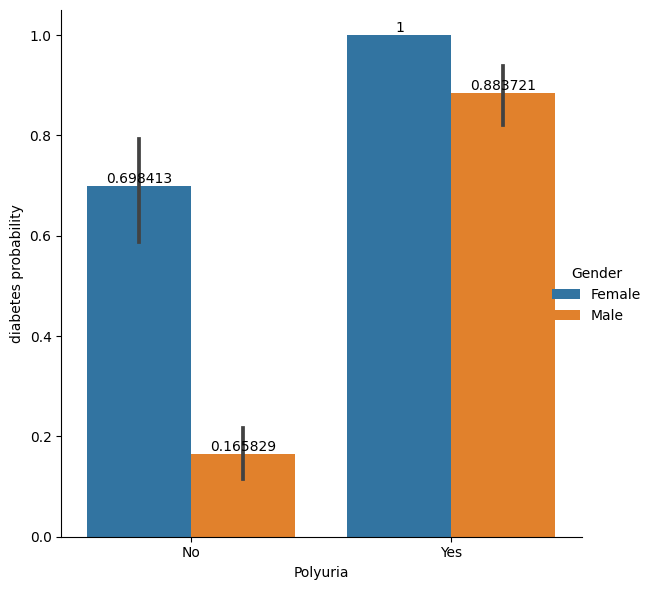

In [15]:
dgraph = sns.catplot(x="Polyuria", y="class", hue="Gender", data=df,
                   height=6, kind="bar")
dgraph = dgraph.set_ylabels("diabetes probability")
dgraph.set_xticklabels(["No", "Yes"])
new_labels = ['Female', 'Male']
for t, l in zip(dgraph._legend.texts, new_labels): t.set_text(l)
ax = dgraph.ax
for i in ax.containers:
    ax.bar_label(i,)

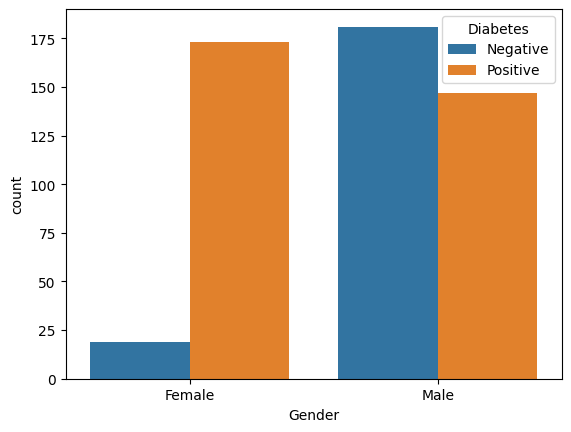

In [16]:
# Distribution of Gender
dd = sns.countplot(x='Gender', hue='class', data=df )
plt.xticks([0, 1], ['Female', 'Male'])
plt.legend(title='Diabetes', labels=['Negative', 'Positive'])


# Train , Test Split and making Logistic Regression model


In [17]:
X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 44552)

In [18]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
class
1    256
0    160
Name: count, dtype: int64
Distribution of target variable in test set
class
1    64
0    40
Name: count, dtype: int64


In [19]:
#Normalizing Data
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [20]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
342,0.22,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0
327,0.46,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1
174,0.22,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0
504,0.28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
112,0.88,0,1,1,1,0,1,1,1,0,1,1,0,1,1,0


In [21]:
# Initializing logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[37  3]
 [ 4 60]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.95      0.94      0.94        64

    accuracy                           0.93       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.93      0.93       104

